In [1]:
import pandas as pd

df_test = pd.read_csv('/fs/ess/PAS0536/ppgneogi/TrafficEvents/US_Accidents_March23.csv')
zipcode_df_1 = pd.read_csv('US_ZipCodes_30140.csv')
zipcode_df_2 = pd.read_csv('US_ZipCodes_23021_151.csv')

In [2]:
df_test.shape

(7728394, 46)

In [3]:
df_test.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
# Combine both the zipcode dataframes (demographics) together
combined_zipcode_df = pd.concat([zipcode_df_1, zipcode_df_2], ignore_index=True)
combined_zipcode_df = combined_zipcode_df.drop_duplicates(subset=['zip_code'])
combined_zipcode_df = combined_zipcode_df.rename(columns={'zip_code': 'Zipcode'})
combined_zipcode_df.reset_index(drop=True, inplace=True)

In [5]:
# Clean 'Zipcode' column in df_test by removing the '-XXXX' part
df_test['Zipcode'] = df_test['Zipcode'].str.split('-').str[0]

In [6]:
# Ensure both columns are of the same type (string)
combined_zipcode_df['Zipcode'] = combined_zipcode_df['Zipcode'].astype(str)

# Perform the merge
merged_df = df_test.merge(combined_zipcode_df, on='Zipcode', how='left')

# Print the shape of the merged DataFrame
print(merged_df.shape)

(7728394, 197)


In [7]:
columns_to_exclude = [
    'ID', 'Source', 'End_Time', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 
    'Street', 'County', 'Country', 'Timezone', 'Airport_Code', 'Wind_Chill(F)', 
    'Precipitation(in)', 'Weather_Timestamp', 'Unnamed: 0', 'County', 'state', 
    'county', 'time_zone', 'area_code', 'latitude', 'longitude', 'population_2019', 
    'population_2020', 'average_household_income_2019($)', 
    'average_household_income_2020($)', 
    'population_2005', 'population_2006', 'population_2007', 'population_2008', 
    'population_2009', 'population_2010', 'population_2011', 'population_2012', 
    'population_2013', 'population_2014', 'population_2015', 'population_2016', 
    'population_2017', 'population_2018', 
    'owner_occupied_home_values_from_$1_to_$24999_dollars', 
    'owner_occupied_home_values_from_$25000_to_$49999_dollars', 
    'owner_occupied_home_values_from_$50000_to_$99999_dollars', 
    'owner_occupied_home_values_from_$100000_to_$149999_dollars', 
    'owner_occupied_home_values_from_$150000_to_$199999_dollars', 
    'owner_occupied_home_values_from_$200000_to_$399999_dollars', 
    'owner_occupied_home_values_from_$400000_to_$749999_dollars', 
    'owner_occupied_home_values_more_than_$750000_dollars', 
    'rented_housing_number_of_rooms_studio', 
    'rented_housing_number_of_rooms_1_bedroom', 
    'rented_housing_number_of_rooms_2_bedroom', 
    'rented_housing_number_of_rooms_3_or_more_bedroom', 
    'average_household_income_2005($)', 'average_household_income_2006($)', 
    'average_household_income_2007($)', 'average_household_income_2008($)', 
    'average_household_income_2009($)', 'average_household_income_2010($)', 
    'average_household_income_2011($)', 'average_household_income_2012($)', 
    'average_household_income_2013($)', 'average_household_income_2014($)', 
    'average_household_income_2015($)', 'average_household_income_2016($)', 
    'average_household_income_2017($)', 'average_household_income_2018($)', 
    'household_income_less_than_25000_dollars', 
    'household_income_from_45000_to_59999_dollars', 
    'household_income_from_60000_to_99999_dollars', 
    'household_income_from_100000_to_149999_dollars', 
    'household_income_from_150000_to_199999_dollars', 
    'household_income_more_than_200000_dollars', 
    'annual_individual_earnings_less_than_10000_dollars', 
    'annual_individual_earnings_from_10000_to_19999_dollars', 
    'annual_individual_earnings_from_20000_to_29999_dollars', 
    'annual_individual_earnings_from_30000_to_39999_dollars', 
    'annual_individual_earnings_from_40000_to_49999_dollars', 
    'annual_individual_earnings_from_50000_to_64999_dollars', 
    'annual_individual_earnings_from_65000_to_74999_dollars', 
    'annual_individual_earnings_from_75000_to_99999_dollars', 
    'annual_individual_earnings_more_than_100000_dollars', 
    'earnings_source_fulltime_with_earnings', 
    'earnings_source_parttime_with_earnings', 
    'earnings_source_no_earnings', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'
]

filtered_df = merged_df.drop(columns=columns_to_exclude)
print(filtered_df.shape)

(7728394, 109)


In [8]:
pd.set_option('display.max_columns', None)
filtered_df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school
0,3,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,45424,36.9,91.0,29.68,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,49930.0,1583.0,20615.0,114900.0,31.54,0.22,19122.0,55219.0,37.0,36.0,38.0,24174.0,25756.0,39474.0,6545.0,142.0,1444.0,33.0,539.0,1753.0,10133.0,3618.0,4315.0,1056.0,3.0,12290.0,6832.0,49710.0,0.0,0.0,100.0,0.0,0.0,0.0,120.0,278.0,241.0,2285.0,4745.0,6547.0,2692.0,1746.0,1912.0,59.0,10778.0,3284.0,5060.0,1493.0,629.0,17.0,322.0,45.0,29.0,0.0,451.0,16017.0,9634.0,13329.0,20891.0,302.0,8.0,75.0,390.0,369.0,2436.0,7467.0,6895.0,3026.0,516.0,485.0,473.0,368.0,2850.0,18719.0,3681.0,4769.0,2747.0,240.0,351.0,8006.0,1994.0,1033.0
1,2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,43068,37.9,100.0,29.65,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,51836.0,2678.0,22586.0,137900.0,19.35,0.12,20806.0,54176.0,35.0,33.0,37.0,24638.0,27198.0,34154.0,13665.0,134.0,1043.0,32.0,89

In [9]:
# Group by (City, State)
grouped = filtered_df.groupby(['City', 'State'])

# Calculate total records per group
total_records = grouped.size().rename('Total_Records')

# Filter for groups with more than 50,000 records
filtered_groups = total_records[total_records > 50000].index

# Subset the DataFrame for valid groups only
filtered_df_subset = filtered_df[filtered_df.set_index(['City', 'State']).index.isin(filtered_groups)]

# Recalculate missing values and align with filtered groups
total_missing = (
    filtered_df_subset.groupby(['City', 'State'])
    .apply(lambda group: group.isna().sum().sum())
    .rename('Total_Missing')
)

# Recalculate total records for filtered groups
total_records = total_records.loc[filtered_groups]

# Calculate missing ratio
missing_ratio = (total_missing / total_records).rename('Missing_Ratio')

# Combine results into a single DataFrame
result = pd.concat([total_records, total_missing, missing_ratio], axis=1)

# Sort by missing ratio
result = result.sort_values(by='Missing_Ratio')

In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(result)

                   Total_Records  Total_Missing  Missing_Ratio
City        State                                             
Charlotte   NC            138345          12253       0.088568
Minneapolis MN             51488           5472       0.106277
Nashville   TN             72670           9787       0.134677
Raleigh     NC             86066          17594       0.204425
Houston     TX            169428          37104       0.218996
Atlanta     GA             68154          14968       0.219620
Phoenix     AZ             53701          12502       0.232808
Orlando     FL            109690          27059       0.246686
Austin      TX             96604          26233       0.271552
Sacramento  CA             66264          22674       0.342177
Los Angeles CA            156491          57986       0.370539
Baton Rouge LA             71588          29190       0.407750
Dallas      TX            130303          75136       0.576625
Miami       FL            186768         172056       0

In [11]:
top_cities_states = result.index[:15]
print(top_cities_states)

MultiIndex([(  'Charlotte', 'NC'),
            ('Minneapolis', 'MN'),
            (  'Nashville', 'TN'),
            (    'Raleigh', 'NC'),
            (    'Houston', 'TX'),
            (    'Atlanta', 'GA'),
            (    'Phoenix', 'AZ'),
            (    'Orlando', 'FL'),
            (     'Austin', 'TX'),
            ( 'Sacramento', 'CA'),
            ('Los Angeles', 'CA'),
            ('Baton Rouge', 'LA'),
            (     'Dallas', 'TX'),
            (      'Miami', 'FL'),
            (  'San Diego', 'CA')],
           names=['City', 'State'])


In [12]:
# Filter filtered_df to include only these (City, State) pairs
filtered_df_top = filtered_df[filtered_df.set_index(['City', 'State']).index.isin(top_cities_states)]

In [13]:
filtered_df_top.shape

(1513064, 109)

In [15]:
filtered_df_top.columns

Index(['Severity', 'Start_Time', 'Start_Lat', 'Start_Lng', 'City', 'State',
       'Zipcode', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       ...
       'educational_attainment_less_than_high_school_diploma',
       'educational_attainment_high_school_graduate',
       'educational_attainment_associate_degree',
       'educational_attainment_bachelor_degree',
       'educational_attainment_master_degree',
       'educational_attainment_professional_school_degree',
       'educational_attainment_doctorate_degree',
       'school_enrollment_enrolled_in_public_school',
       'school_enrollment_enrolled_in_private_school',
       'school_enrollment_not_enrolled_in_school'],
      dtype='object', length=109)

In [16]:
######################### H3 ID ############################
import h3
def create_h3_ids(row, level):
    lat, lng = row['Start_Lat'], row['Start_Lng']
    h3_id = h3.geo_to_h3(lat, lng, level)
    return h3_id

# Create the new DataFrame with the required columns for Level 7
new_df_7 = pd.DataFrame()
new_df_7['H3 ID Level 7'] = filtered_df_top.apply(lambda row: create_h3_ids(row, 7), axis=1) # <------for tile and images...

# Remove duplicate H3 ID Level 7 entries
new_df_7 = new_df_7.drop_duplicates(subset=['H3 ID Level 7'])

# Reset the index to create unique row numbers for Area ID 7
new_df_7.reset_index(drop=True, inplace=True)
new_df_7.reset_index(inplace=True)
new_df_7.rename(columns={'index': 'Area ID 7'}, inplace=True)

In [17]:
new_df_7.shape

(3131, 2)

In [18]:
new_df_7.head()

,Area ID 7,H3 ID Level 7
0,0,872832868ffffff
1,1,872832b9cffffff
2,2,872832baeffffff
3,3,87283286affffff
4,4,872832a2cffffff


In [22]:
print("********************* Total Zipcodes present in the top 15 cities: " + str(len(set(filtered_df_top['Zipcode']))))

********************* Total Zipcodes present in the top 15 cities: 672


In [23]:
filtered_df_top.shape

(1513064, 109)

In [24]:
filtered_df_top.head()

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school
743,2,2016-06-21 11:16:14,38.481682,-121.408768,Sacramento,CA,95828,86.0,26.0,30.00,10.0,NNW,9.2,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.00,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0
744,3,2016-06-21 11:16:55,38.682713,-121.336288,Sacramento,CA,95841,86.0,20.0,30.01,10.0,NW,9.2,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,19448.0,4771.0,8804.0,171200.0,4.08,0.00,7957.0,36967.0,33.0,32.0,34.0,9347.0,10101.0,13753.0,1974.0,255.0,886.0,112.0,1135.0,1333.0,

In [25]:
# Add the 'H3 ID Level 7' and the 'Area ID 7' for each record (based on the latitude and longitude)
filtered_df_top['H3 ID Level 7'] = filtered_df_top.apply(lambda row: create_h3_ids(row, 7), axis=1)
filtered_df_top = filtered_df_top.merge(new_df_7[['H3 ID Level 7', 'Area ID 7']], on='H3 ID Level 7', how='left')

/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
filtered_df_top.shape

(1513064, 111)

In [27]:
filtered_df_top.head()

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Zipcode,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,H3 ID Level 7,Area ID 7
0,2,2016-06-21 11:16:14,38.481682,-121.408768,Sacramento,CA,95828,86.0,26.0,30.00,10.0,NNW,9.2,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.00,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,872832868ffffff,0
1,3,2016-06-21 11:16:55,38.682713,-121.336288,Sacramento,CA,95841,86.0,20.0,30.01,10.0,NW,9.2,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,19448.0,4771.0,8804.0,171200.0,4.08,0.00,7957.0,36967.0,33.0,32.0,34.0,9347.0,10101.0,13753.0,1

In [28]:
# Count records with no missing values per 'Area ID 7'
non_missing_counts = filtered_df_top.dropna().groupby('Area ID 7').size().reset_index(name='Non_Missing_Records')

# Count total records per 'Area ID 7'
total_counts = filtered_df_top.groupby('Area ID 7').size().reset_index(name='Total_Records')

# Merge the two results to get both counts side-by-side
area_counts = pd.merge(non_missing_counts, total_counts, on='Area ID 7', how='right')

# Fill missing Non_Missing_Records with 0 (if an Area ID has no completely non-missing rows)
area_counts['Non_Missing_Records'] = area_counts['Non_Missing_Records'].fillna(0).astype(int)

# Add City and State information (if applicable to Area ID 7)
city_state_mapping = filtered_df_top[['Area ID 7', 'City', 'State']].drop_duplicates()
area_counts = pd.merge(area_counts, city_state_mapping, on='Area ID 7', how='left')

# Reorder columns for better readability
area_counts = area_counts[['Area ID 7', 'City', 'State', 'Non_Missing_Records', 'Total_Records']]

# Display the final result
print(area_counts)

      Area ID 7         City State  Non_Missing_Records  Total_Records
0             0   Sacramento    CA                 2326           2476
1             1   Sacramento    CA                 1323           1400
2             2   Sacramento    CA                 1489           1541
3             3   Sacramento    CA                  587            620
4             4   Sacramento    CA                  429            443
5             5   Sacramento    CA                  720            784
6             6   Sacramento    CA                  462            482
7             7   Sacramento    CA                 1022           1073
8             8   Sacramento    CA                    0             98
9             9   Sacramento    CA                  760            804
10           10   Sacramento    CA                  735            787
11           11   Sacramento    CA                 2288           2435
12           12   Sacramento    CA                  529            559
13    

In [29]:
area_counts.to_csv('NonMissing_AreaID7.csv', index=False)

In [30]:
area_counts_under50 = area_counts[area_counts['Total_Records'] >= 50]

In [31]:
area_counts_under50.shape

(2114, 5)

In [36]:
# How many Rows (Unique Area IDs) we had before and have now in each City (after removing total counts below 50):

city_counts_before = area_counts.groupby('City').size().reset_index(name='Total_AreIDs_before_deletion')
print(city_counts_before)

city_counts = area_counts_under50.groupby('City').size().reset_index(name='Total_AreIDs_after_deletion')
print(city_counts)

           City  Total_AreIDs_before_deletion
0       Atlanta                           186
1        Austin                           258
2   Baton Rouge                           118
3     Charlotte                           257
4        Dallas                           214
5       Houston                           391
6   Los Angeles                           137
7         Miami                           258
8   Minneapolis                           136
9     Nashville                           171
10      Orlando                           288
11      Phoenix                           221
12      Raleigh                           201
13   Sacramento                           146
14    San Diego                           149
           City  Total_AreIDs_after_deletion
0       Atlanta                          101
1        Austin                          169
2   Baton Rouge                           83
3     Charlotte                          208
4        Dallas                        

In [37]:
area_counts_under50['Non_Missing_Ratio'] = area_counts_under50['Non_Missing_Records'] / area_counts_under50['Total_Records']
sorted_area_counts = area_counts_under50.sort_values(by=['City', 'Non_Missing_Ratio'], ascending=[True, False])
print(sorted_area_counts)

      Area ID 7         City State  Non_Missing_Records  Total_Records  \
864         864      Atlanta    GA                  129            129   
1643       1643      Atlanta    GA                   62             62   
838         838      Atlanta    GA                  353            355   
759         759      Atlanta    GA                  312            314   
805         805      Atlanta    GA                  140            141   
803         803      Atlanta    GA                  416            420   
776         776      Atlanta    GA                  270            273   
780         780      Atlanta    GA                  525            534   
831         831      Atlanta    GA                  217            221   
837         837      Atlanta    GA                  131            134   
847         847      Atlanta    GA                  131            134   
748         748      Atlanta    GA                  414            424   
764         764      Atlanta    GA    

/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [60]:
filtered_data = sorted_area_counts[sorted_area_counts['Non_Missing_Ratio'] >= 0.90]
city_counts = filtered_data.groupby('City').size().reset_index(name='Total_AreIDs_after_deleting_below_90')
print(city_counts)

           City  Total_AreIDs_after_deleting_below_90
0       Atlanta                                    62
1        Austin                                    64
2   Baton Rouge                                    79
3     Charlotte                                   150
4        Dallas                                   147
5       Houston                                   201
6   Los Angeles                                    43
7         Miami                                   176
8   Minneapolis                                    89
9     Nashville                                   105
10      Orlando                                   182
11      Phoenix                                    68
12      Raleigh                                   116
13   Sacramento                                    88
14    San Diego                                    78


In [61]:
filtered_data.shape

(1648, 6)

In [63]:
filtered_data.head()

,Area ID 7,City,State,Non_Missing_Records,Total_Records,Non_Missing_Ratio
864,864,Atlanta,GA,129,129,1.000000
1643,1643,Atlanta,GA,62,62,1.000000
838,838,Atlanta,GA,353,355,0.994366
759,759,Atlanta,GA,312,314,0.993631
805,805,Atlanta,GA,140,141,0.992908


In [64]:
# Keep only the Rows from filtered_df_top whose Area ID is present in filtered_data
area_id_7_list = filtered_data['Area ID 7'].unique()
filtered_df_top = filtered_df_top[filtered_df_top['Area ID 7'].isin(area_id_7_list)]

In [65]:
filtered_df_top.shape

(655560, 111)

In [46]:
filtered_df_test = filtered_df_top[['Severity', 'Start_Time', 'State', 'City', 'Area ID 7']]

In [69]:
from itertools import product
import pandas as pd

# Define start and end time for the bins with 6-hour intervals
start_time = pd.Timestamp('2016-03-22 00:00:00')
end_time = pd.Timestamp('2023-03-31 23:59:59')
time_bins = pd.date_range(start=start_time, end=end_time, freq='3H')

# Assign each record to a time bin (as Interval objects, not categories)
filtered_df_test['Time_Bin'] = pd.cut(
    pd.to_datetime(filtered_df_test['Start_Time']), bins=time_bins, include_lowest=True, right=False
)

# Verify Time_Bin types
print("Filtered Time_Bin dtype after correction:", filtered_df_test['Time_Bin'].dtype)

# Grouping by 'Area ID 7', 'City', and 'Time_Bin'
grouped_data = filtered_df_test.groupby(['Area ID 7', 'City', 'Time_Bin']).apply(
    lambda group: f"{len(group)} Accidents (Severity {', '.join(map(str, sorted(group['Severity'].unique())))})"
).reset_index(name='Accident_Frequency')

# Generate a complete time-series DataFrame
unique_area_ids = filtered_df_test['Area ID 7'].unique()
unique_cities = filtered_df_test[['Area ID 7', 'City']].drop_duplicates()
all_combinations = list(product(unique_area_ids, pd.IntervalIndex.from_breaks(time_bins, closed='left')))
complete_time_series = pd.DataFrame(all_combinations, columns=['Area ID 7', 'Time_Bin'])

# Verify Time_Bin types in complete_time_series
print("Complete Time-Series Time_Bin dtype:", complete_time_series['Time_Bin'].dtype)

# Add city information
complete_time_series = complete_time_series.merge(unique_cities, on='Area ID 7', how='left')

# Merge complete time-series with grouped data
time_series_data = complete_time_series.merge(grouped_data, on=['Area ID 7', 'City', 'Time_Bin'], how='left')

# Fill missing accident data
time_series_data['Accident_Frequency'] = time_series_data['Accident_Frequency'].fillna('0 Accidents')

# Reorganize columns
time_series_data = time_series_data[['Area ID 7', 'City', 'Time_Bin', 'Accident_Frequency']]

# Display the final result
print("Final Time-Series Data sample:")
print(time_series_data.head())


Filtered Time_Bin dtype after correction: category


In [67]:
unique_accident_frequencies = time_series_data['Accident_Frequency'].unique()

# Display the unique values
print(unique_accident_frequencies)

['0 Accidents' '1 Accidents (Severity 2)' '2 Accidents (Severity 2, 3)'
 '1 Accidents (Severity 3)' '2 Accidents (Severity 2)'
 '3 Accidents (Severity 2)' '2 Accidents (Severity 3)'
 '4 Accidents (Severity 2)' '5 Accidents (Severity 2)'
 '3 Accidents (Severity 2, 3)' '1 Accidents (Severity 1)'
 '2 Accidents (Severity 4)' '2 Accidents (Severity 2, 4)'
 '1 Accidents (Severity 4)' '8 Accidents (Severity 2)'
 '7 Accidents (Severity 1, 2)' '4 Accidents (Severity 1, 2, 4)'
 '2 Accidents (Severity 1)' '2 Accidents (Severity 1, 2)'
 '6 Accidents (Severity 1, 2)' '4 Accidents (Severity 1, 2)'
 '3 Accidents (Severity 1, 2)' '6 Accidents (Severity 2)'
 '11 Accidents (Severity 2)' '13 Accidents (Severity 2)'
 '7 Accidents (Severity 2)' '53 Accidents (Severity 2)'
 '15 Accidents (Severity 2)' '9 Accidents (Severity 2)'
 '23 Accidents (Severity 2)' '14 Accidents (Severity 2)'
 '19 Accidents (Severity 2)' '12 Accidents (Severity 2)'
 '5 Accidents (Severity 2, 3)' '10 Accidents (Severity 2)'
 '3 Accid

In [68]:
time_series_data.to_csv('AreaID7_time_series_data_3Hrs.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('/fs/ess/PAS0536/ppgneogi/TrafficEvents/TimeSeries_With_Weather.csv')

/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (114) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Area ID 7,time_bin,Total_Accidents,Acc_Severity,Start_Lat,Start_Lng,City,State,Zipcode,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,H3 ID Level 7,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,skyc1
0,0,2016-06-01 00:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,872832868ffffff,69.666667,50.000000,49.820000,150.000000,3.333333,0.0,29.760000,1007.766667,10.0,CLR
1,0,2016-06-01 03:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,5

In [3]:
df.shape

(35349160, 115)

In [7]:
df[df['Area ID 7']==2].shape

(19960, 115)

In [8]:
# Number of unique 'Area ID 7' in the entire dataframe
total_unique_area_ids = df['Area ID 7'].nunique()
print(f"Total unique 'Area ID 7': {total_unique_area_ids}")

# Number of unique 'Area ID 7' for each city
unique_area_ids_per_city = df.groupby('City')['Area ID 7'].nunique().reset_index()
unique_area_ids_per_city.rename(columns={'Area ID 7': 'Unique Area ID Count'}, inplace=True)

print("Unique 'Area ID 7' per city:")
print(unique_area_ids_per_city)


Total unique 'Area ID 7': 1771
Unique 'Area ID 7' per city:
           City  Unique Area ID Count
0       Atlanta                    88
1        Austin                   139
2   Baton Rouge                    64
3     Charlotte                   183
4        Dallas                   140
5       Houston                   246
6   Los Angeles                    85
7         Miami                   152
8   Minneapolis                    84
9     Nashville                    93
10      Orlando                   150
11      Phoenix                   106
12      Raleigh                    97
13   Sacramento                    74
14    San Diego                    70


In [9]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 

tmpf      7857231
dwpf      7889233
relh      7910436
drct      8170737
sknt      7854715
p01i      7935530
alti      7835083
mslp     12414491
vsby      7875319
skyc1     7861187
dtype: int64


In [13]:
df[df['tmpf'].isna()].head(10)

,Area ID 7,time_bin,Total_Accidents,Acc_Severity,Start_Lat,Start_Lng,City,State,Zipcode,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,H3 ID Level 7,tmpf,dwpf,relh,drct,sknt,p01i,alti,mslp,vsby,skyc1
1172,0,2016-10-25 12:00:00,1,[2],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,872832868ffffff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1173,0,2016-10-25 15:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0

In [4]:
import pandas as pd

# Load the SacramentoWeather.xlsx file
file_path = "SacramentoWeather.xlsx"
selected_features = ['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'skyc1']

# Load only the selected columns
df = pd.read_excel(file_path, usecols=selected_features)

# Convert 'valid' column to datetime
df['valid'] = pd.to_datetime(df['valid'])

# Display basic info and first few rows
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0]) 


tmpf      163
dwpf      170
relh      223
drct     3865
sknt      519
p01i     2201
alti       85
mslp     8777
vsby      596
skyc1     216
dtype: int64


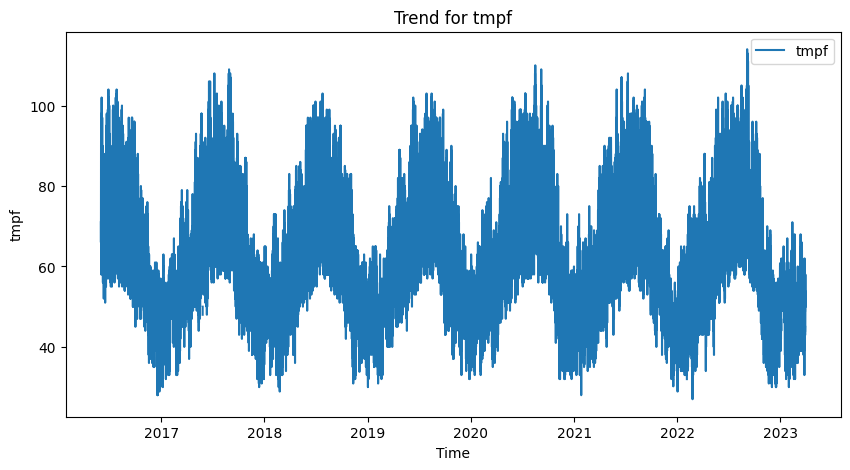

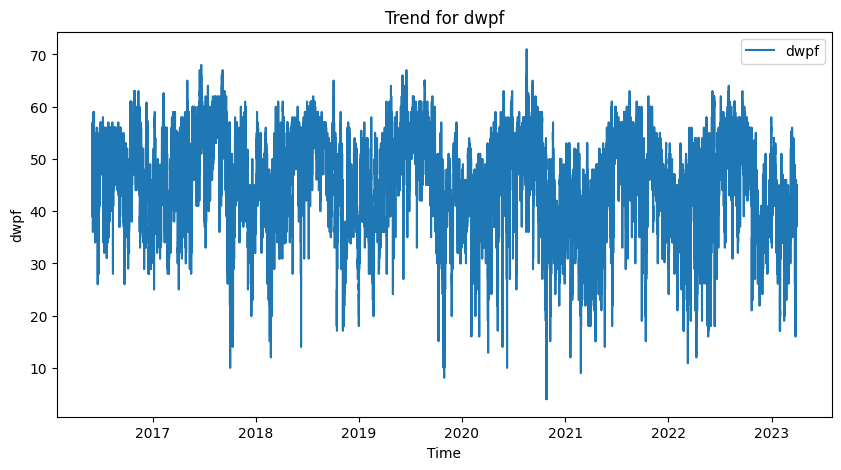

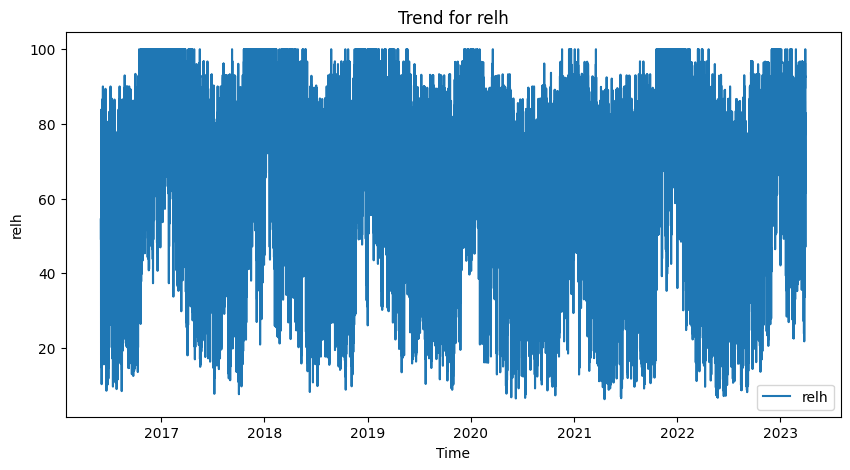

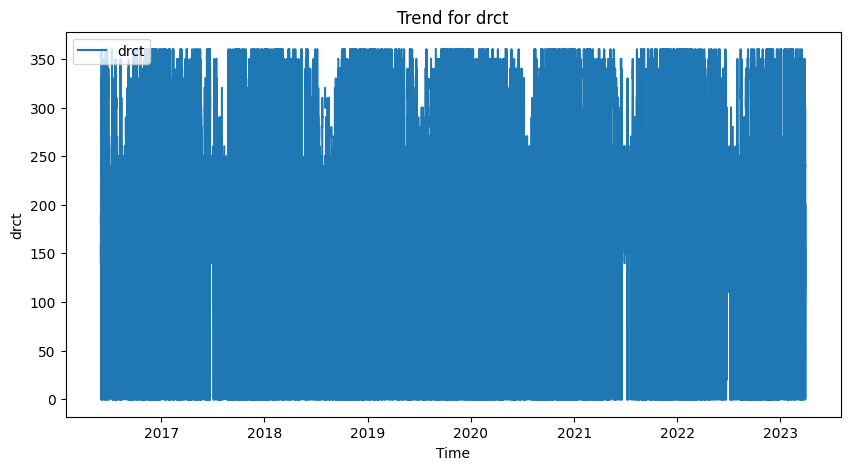

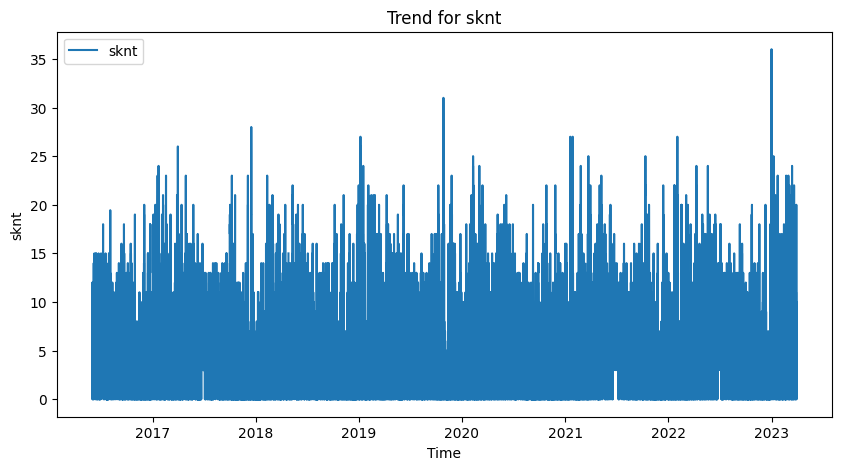

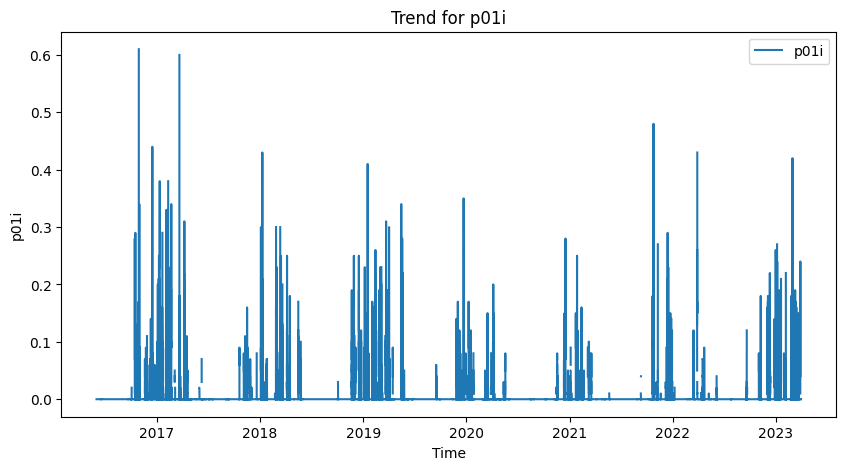

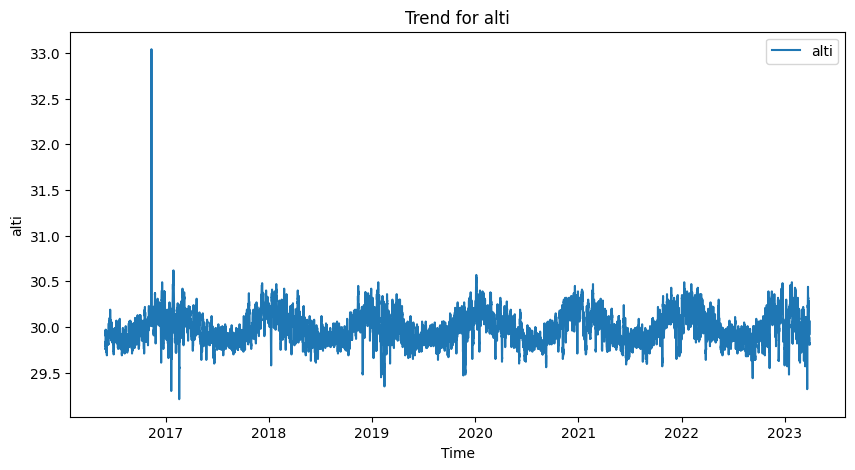

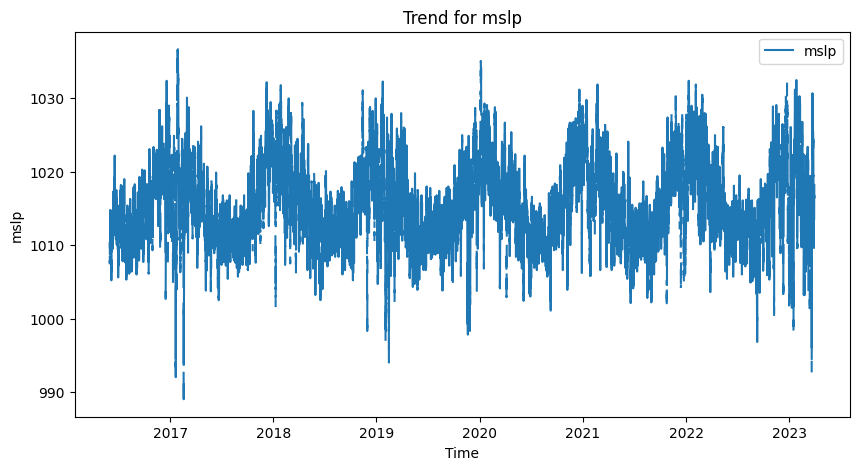

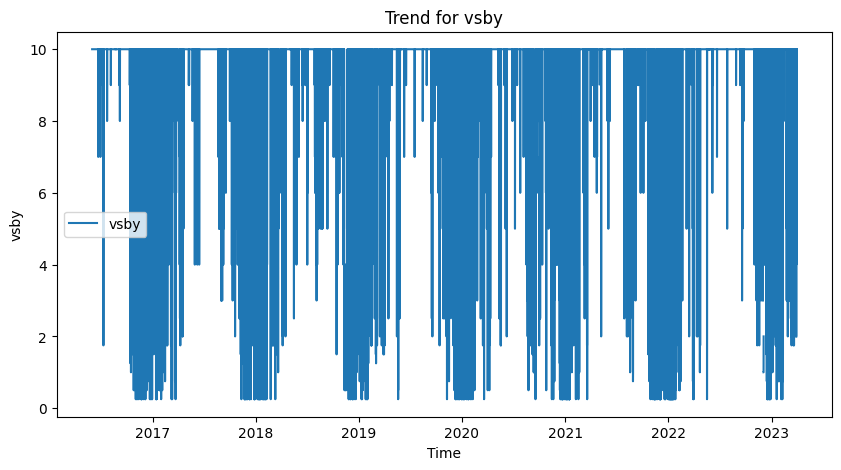

In [5]:
import matplotlib.pyplot as plt

# Set 'valid' as the index for easier plotting
df.set_index('valid', inplace=True)

# Plot each feature to observe trends
numeric_features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby']

for feature in numeric_features:
    plt.figure(figsize=(10, 5))
    plt.plot(df[feature], label=feature)
    plt.title(f"Trend for {feature}")
    plt.xlabel("Time")
    plt.ylabel(feature)
    plt.legend()
    plt.show()

# Reset index after visualization
df.reset_index(inplace=True)


In [6]:
# Set 'valid' as the index
df.set_index('valid', inplace=True)

# List of numeric features to interpolate
numeric_features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby']

# Interpolate missing values based on time
for feature in numeric_features:
    df[feature] = df[feature].interpolate(method='time', limit_direction='both')

# Check if missing values are filled
print(df[numeric_features].isna().sum())


tmpf    0
dwpf    0
relh    0
drct    0
sknt    0
p01i    0
alti    0
mslp    0
vsby    0
dtype: int64


In [7]:
# Reset the index
df.reset_index(inplace=True)

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# Load the dataset
file_path = "SacramentoWeather.xlsx"
df = pd.read_excel(file_path)


# Set 'valid' as the index
df.set_index('valid', inplace=True)

# List of numeric features to interpolate
numeric_features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby']

# Interpolate missing values based on time
for feature in numeric_features:
    df[feature] = df[feature].interpolate(method='time', limit_direction='both')

df.reset_index(inplace=True)

################################################### skyc1 ##############################################

# Select relevant columns
columns_to_select = ['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'skyc1']
df = df[columns_to_select]

# Convert `valid` to datetime and extract temporal features
df['valid'] = pd.to_datetime(df['valid'])
df['month'] = df['valid'].dt.month
df['hour'] = df['valid'].dt.hour
df['day'] = df['valid'].dt.day
df['weekday'] = df['valid'].dt.weekday

# Encode the target categorical column `skyc1`
label_encoder = LabelEncoder()
df['skyc1_encoded'] = label_encoder.fit_transform(df['skyc1'].fillna('Unknown'))  # Temporarily encode missing as 'Unknown'

# Separate rows with missing and non-missing values
non_missing = df[df['skyc1'].notna()]
missing = df[df['skyc1'].isna()]

# Features and target
features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'month', 'hour', 'day', 'weekday']
target = 'skyc1_encoded'

# Fill remaining missing values in numerical features for model training
non_missing.fillna(non_missing.mean(), inplace=True)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    non_missing[features],
    non_missing[target],
    test_size=0.2,
    random_state=42
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.long)

# Dataset class
class WeatherDataset(Dataset):
    def __init__(self, features, labels=None):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        item = {'features': self.features[idx]}
        if self.labels is not None:
            item['labels'] = self.labels[idx]
        return item

# Create datasets
train_dataset = WeatherDataset(X_train, y_train)
val_dataset = WeatherDataset(X_val, y_val)

# Define the model
class TransformerImputer(torch.nn.Module):
    def __init__(self, input_dim, num_classes, nhead=1):  # Set nhead=1 to ensure compatibility
        super(TransformerImputer, self).__init__()
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_dim, nhead=nhead),
            num_layers=2
        )
        self.fc = torch.nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer(x.unsqueeze(1))  # Add sequence dimension
        x = self.fc(x.mean(dim=1))
        return x

input_dim = len(features)
num_classes = len(label_encoder.classes_)
nhead = 1  # Ensure compatibility with input_dim

model = TransformerImputer(input_dim=input_dim, num_classes=num_classes, nhead=nhead)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Training loop
for epoch in range(10):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        features = batch['features']
        labels = batch['labels']
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            features = batch['features']
            labels = batch['labels']
            outputs = model(features)
            val_loss += criterion(outputs, labels).item()

    print(f"Epoch {epoch+1}, Validation Loss: {val_loss / len(val_loader)}")

# Ensure 'features' contains the correct column names as strings
features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'month', 'hour', 'day', 'weekday']

# Fill missing values in numeric columns of the missing DataFrame
missing_features = missing[features].copy()

# Fill numeric missing values with the mean of the respective columns
missing_features = missing_features.fillna(missing_features.mean())

missing_features_tensor = torch.tensor(missing_features.values, dtype=torch.float32)

model.eval()
with torch.no_grad():
    predictions = model(missing_features_tensor).argmax(dim=1)

missing['skyc1_imputed'] = label_encoder.inverse_transform(predictions.numpy())
# Combine the imputed and non-missing datasets
df_combined = pd.concat([non_missing, missing], axis=0)

# Step 5: Visualize Trends
df_combined['valid'] = pd.to_datetime(df_combined['valid'])
df_combined.sort_values(by='valid', inplace=True)

df_combined['skyc1'] = df_combined['skyc1'].fillna(df_combined['skyc1_imputed'])

# Drop the temporary column skyc1_imputed
df_combined.drop(columns=['skyc1_imputed'], inplace=True)
df.drop(columns=['month'], inplace=True)
df.drop(columns=['hour'], inplace=True)
df.drop(columns=['day'], inplace=True)
df.drop(columns=['weekday'], inplace=True)
df.drop(columns=['skyc1_encoded'], inplace=True)
df['skyc1']=df_combined['skyc1']


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:52: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Epoch 1, Validation Loss: 0.8542702693097731
Epoch 2, Validation Loss: 0.848548475223429
Epoch 3, Validation Loss: 0.8250962949500364
Epoch 4, Validation Loss: 0.8138527499928194
Epoch 5, Validation Loss: 0.7974359005339006
Epoch 6, Validation Loss: 0.8028267344306497
Epoch 7, Validation Loss: 0.8116353501993067
Epoch 8, Validation Loss: 0.789128603514503
Epoch 9, Validation Loss: 0.7846622287525851
Epoch 10, Validation Loss: 0.7860944206574384


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


"plt.figure(figsize=(15, 5))\nplt.plot(df_combined['valid'], df_combined['skyc1_encoded'], label='Original Trend', alpha=0.7)\nplt.scatter(missing['valid'], predictions, color='red', label='Imputed Values', alpha=0.5)\nplt.xlabel('Time')\nplt.ylabel('Skyc1 (Encoded)')\nplt.title('Trend of Skyc1 Over Time')\nplt.legend()\nplt.show()"

In [47]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# List of files to process
files = [
    "SanDiegoWeather", "SacramentoWeather", "LosAngelesWeather",
    "BatonRougeWeather", "OrlandoWeather", "MiamiWeather",
    "NashvilleWeather", "MinneapolisWeather", "CharlotteWeather",
    "RaleighWeather", "PhoenixWeather", "HoustonWeather",
    "DallasWeather", "AustinWeather", "AtlantaWeather"
]

# File path where the weather files are stored
file_path = ""  

# Directory to save processed files
output_path = ""  # Replace with your desired output path

# Dataset class
class WeatherDataset(Dataset):
    def __init__(self, features, labels=None):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        item = {'features': self.features[idx]}
        if self.labels is not None:
            item['labels'] = self.labels[idx]
        return item

# Model class
class TransformerImputer(torch.nn.Module):
    def __init__(self, input_dim, num_classes, nhead=1):
        super(TransformerImputer, self).__init__()
        self.transformer = torch.nn.TransformerEncoder(
            torch.nn.TransformerEncoderLayer(d_model=input_dim, nhead=nhead),
            num_layers=2
        )
        self.fc = torch.nn.Linear(input_dim, num_classes)

    def forward(self, x):
        x = self.transformer(x.unsqueeze(1))  # Add sequence dimension
        x = self.fc(x.mean(dim=1))
        return x

# Process each file
for file_name in files:
    # Load the data
    file = os.path.join(file_path, file_name + ".xlsx")
    df = pd.read_excel(file)

    # Set 'valid' as the index and interpolate numeric features
    df.set_index('valid', inplace=True)
    numeric_features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby']
    for feature in numeric_features:
        df[feature] = df[feature].interpolate(method='time', limit_direction='both')
    df.reset_index(inplace=True)

    # Prepare for `skyc1` processing
    df['valid'] = pd.to_datetime(df['valid'])
    df['month'] = df['valid'].dt.month
    df['hour'] = df['valid'].dt.hour
    df['day'] = df['valid'].dt.day
    df['weekday'] = df['valid'].dt.weekday
    label_encoder = LabelEncoder()
    df['skyc1_encoded'] = label_encoder.fit_transform(df['skyc1'].fillna('Unknown'))

    non_missing = df[df['skyc1'].notna()]
    missing = df[df['skyc1'].isna()]
    features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'month', 'hour', 'day', 'weekday']
    target = 'skyc1_encoded'

    non_missing.fillna(non_missing.mean(), inplace=True)
    X_train, X_val, y_train, y_val = train_test_split(
        non_missing[features],
        non_missing[target],
        test_size=0.2,
        random_state=42
    )
    X_train = torch.tensor(X_train.values, dtype=torch.float32)
    y_train = torch.tensor(y_train.values, dtype=torch.long)
    X_val = torch.tensor(X_val.values, dtype=torch.float32)
    y_val = torch.tensor(y_val.values, dtype=torch.long)
    train_dataset = WeatherDataset(X_train, y_train)
    val_dataset = WeatherDataset(X_val, y_val)

    # Define and train the model
    input_dim = len(features)
    num_classes = len(label_encoder.classes_)
    model = TransformerImputer(input_dim=input_dim, num_classes=num_classes, nhead=1)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    for epoch in range(10):
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            features = batch['features']
            labels = batch['labels']
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                features = batch['features']
                labels = batch['labels']
                outputs = model(features)
                val_loss += criterion(outputs, labels).item()
        print(f"{file_name} - Epoch {epoch + 1}, Validation Loss: {val_loss / len(val_loader)}")


    # Ensure 'features' contains the correct column names as strings
    features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'month', 'hour', 'day', 'weekday']

    # Fill missing values in numeric columns of the missing DataFrame
    missing_features = missing[features].copy()

    # Fill numeric missing values with the mean of the respective columns
    missing_features = missing_features.fillna(missing_features.mean())

    missing_features_tensor = torch.tensor(missing_features.values, dtype=torch.float32)

    model.eval()
    with torch.no_grad():
        predictions = model(missing_features_tensor).argmax(dim=1)

    missing['skyc1_imputed'] = label_encoder.inverse_transform(predictions.numpy())
    # Combine the imputed and non-missing datasets
    df_combined = pd.concat([non_missing, missing], axis=0)

    # Step 5: Visualize Trends
    df_combined['valid'] = pd.to_datetime(df_combined['valid'])
    df_combined.sort_values(by='valid', inplace=True)

    df_combined['skyc1'] = df_combined['skyc1'].fillna(df_combined['skyc1_imputed'])

    # Drop the temporary column skyc1_imputed
    df_combined.drop(columns=['skyc1_imputed'], inplace=True)
    df.drop(columns=['month'], inplace=True)
    df.drop(columns=['hour'], inplace=True)
    df.drop(columns=['day'], inplace=True)
    df.drop(columns=['weekday'], inplace=True)
    df.drop(columns=['skyc1_encoded'], inplace=True)
    df['skyc1']=df_combined['skyc1']


    # Save processed file
    output_file = os.path.join(output_path, file_name + "_imputed.xlsx")
    df.to_excel(output_file, index=False)
    print(f"Processed and saved: {output_file}")


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SanDiegoWeather - Epoch 1, Validation Loss: 1.4113240695661968
SanDiegoWeather - Epoch 2, Validation Loss: 1.3847966651121775
SanDiegoWeather - Epoch 3, Validation Loss: 1.374699334634675
SanDiegoWeather - Epoch 4, Validation Loss: 1.3434672640429604
SanDiegoWeather - Epoch 5, Validation Loss: 1.3411438955201043
SanDiegoWeather - Epoch 6, Validation Loss: 1.3288073317872153
SanDiegoWeather - Epoch 7, Validation Loss: 1.321774810883734
SanDiegoWeather - Epoch 8, Validation Loss: 1.3218952851163017
SanDiegoWeather - Epoch 9, Validation Loss: 1.3097386903233
SanDiegoWeather - Epoch 10, Validation Loss: 1.3106951895687315


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: SanDiegoWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


SacramentoWeather - Epoch 1, Validation Loss: 0.8494851955946754
SacramentoWeather - Epoch 2, Validation Loss: 0.8354058472549214
SacramentoWeather - Epoch 3, Validation Loss: 0.8004165265840643
SacramentoWeather - Epoch 4, Validation Loss: 0.8009100360730115
SacramentoWeather - Epoch 5, Validation Loss: 0.7891556624103995
SacramentoWeather - Epoch 6, Validation Loss: 0.775598205538357
SacramentoWeather - Epoch 7, Validation Loss: 0.7792414963946623
SacramentoWeather - Epoch 8, Validation Loss: 0.7605663436300615
SacramentoWeather - Epoch 9, Validation Loss: 0.7574973018730388
SacramentoWeather - Epoch 10, Validation Loss: 0.7600433193234837


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: SacramentoWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


LosAngelesWeather - Epoch 1, Validation Loss: 1.1193404358116752
LosAngelesWeather - Epoch 2, Validation Loss: 1.1013457472527837
LosAngelesWeather - Epoch 3, Validation Loss: 1.0787190591480331
LosAngelesWeather - Epoch 4, Validation Loss: 1.0732640865334275
LosAngelesWeather - Epoch 5, Validation Loss: 1.0680038931594114
LosAngelesWeather - Epoch 6, Validation Loss: 1.0502673542734309
LosAngelesWeather - Epoch 7, Validation Loss: 1.0434786649971093
LosAngelesWeather - Epoch 8, Validation Loss: 1.0504835964031762
LosAngelesWeather - Epoch 9, Validation Loss: 1.0450554240323782
LosAngelesWeather - Epoch 10, Validation Loss: 1.0219898686888964


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: LosAngelesWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


BatonRougeWeather - Epoch 1, Validation Loss: 1.4428992244330319
BatonRougeWeather - Epoch 2, Validation Loss: 1.3598273008158712
BatonRougeWeather - Epoch 3, Validation Loss: 1.3489776813622676
BatonRougeWeather - Epoch 4, Validation Loss: 1.290987170404858
BatonRougeWeather - Epoch 5, Validation Loss: 1.2835231016982684
BatonRougeWeather - Epoch 6, Validation Loss: 1.2580176339004978
BatonRougeWeather - Epoch 7, Validation Loss: 1.2538179583621747
BatonRougeWeather - Epoch 8, Validation Loss: 1.2444192714462377
BatonRougeWeather - Epoch 9, Validation Loss: 1.2486200046659721
BatonRougeWeather - Epoch 10, Validation Loss: 1.2352355294155353


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: BatonRougeWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


OrlandoWeather - Epoch 1, Validation Loss: 1.407148020721115
OrlandoWeather - Epoch 2, Validation Loss: 1.3474801931761007
OrlandoWeather - Epoch 3, Validation Loss: 1.3027477363305808
OrlandoWeather - Epoch 4, Validation Loss: 1.2635111684820293
OrlandoWeather - Epoch 5, Validation Loss: 1.2595731684591918
OrlandoWeather - Epoch 6, Validation Loss: 1.2373039204198701
OrlandoWeather - Epoch 7, Validation Loss: 1.245024007110469
OrlandoWeather - Epoch 8, Validation Loss: 1.2269906194600384
OrlandoWeather - Epoch 9, Validation Loss: 1.2329720451241046
OrlandoWeather - Epoch 10, Validation Loss: 1.2303594035648666


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: OrlandoWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


MiamiWeather - Epoch 1, Validation Loss: 1.1170140688910204
MiamiWeather - Epoch 2, Validation Loss: 1.1039078581859083
MiamiWeather - Epoch 3, Validation Loss: 1.090325091034174
MiamiWeather - Epoch 4, Validation Loss: 1.0804548033458345
MiamiWeather - Epoch 5, Validation Loss: 1.0790268962874132
MiamiWeather - Epoch 6, Validation Loss: 1.0713967203217394
MiamiWeather - Epoch 7, Validation Loss: 1.0579497652018772
MiamiWeather - Epoch 8, Validation Loss: 1.0501816147828804
MiamiWeather - Epoch 9, Validation Loss: 1.0349076383692377
MiamiWeather - Epoch 10, Validation Loss: 1.0162246853989714


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: MiamiWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


NashvilleWeather - Epoch 1, Validation Loss: 1.4835046445590216
NashvilleWeather - Epoch 2, Validation Loss: 1.4594475888988694
NashvilleWeather - Epoch 3, Validation Loss: 1.4411896415614864
NashvilleWeather - Epoch 4, Validation Loss: 1.4285785940079048
NashvilleWeather - Epoch 5, Validation Loss: 1.4151256795896212
NashvilleWeather - Epoch 6, Validation Loss: 1.398654522276685
NashvilleWeather - Epoch 7, Validation Loss: 1.4033439249003938
NashvilleWeather - Epoch 8, Validation Loss: 1.3946656534503423
NashvilleWeather - Epoch 9, Validation Loss: 1.3929162549538059
NashvilleWeather - Epoch 10, Validation Loss: 1.3968472700727284


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: NashvilleWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


MinneapolisWeather - Epoch 1, Validation Loss: 1.6132811051148634
MinneapolisWeather - Epoch 2, Validation Loss: 1.5571119125072772
MinneapolisWeather - Epoch 3, Validation Loss: 1.53296969303718
MinneapolisWeather - Epoch 4, Validation Loss: 1.5066076993942261
MinneapolisWeather - Epoch 5, Validation Loss: 1.5059344851053678
MinneapolisWeather - Epoch 6, Validation Loss: 1.4892171731361976
MinneapolisWeather - Epoch 7, Validation Loss: 1.483737702553089
MinneapolisWeather - Epoch 8, Validation Loss: 1.4789161205291748
MinneapolisWeather - Epoch 9, Validation Loss: 1.4747581316874578
MinneapolisWeather - Epoch 10, Validation Loss: 1.47657574231808
Processed and saved: MinneapolisWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


CharlotteWeather - Epoch 1, Validation Loss: 1.3728046136910446
CharlotteWeather - Epoch 2, Validation Loss: 1.3525147327617908
CharlotteWeather - Epoch 3, Validation Loss: 1.3420614358081953
CharlotteWeather - Epoch 4, Validation Loss: 1.332432465145537
CharlotteWeather - Epoch 5, Validation Loss: 1.3234550754701158
CharlotteWeather - Epoch 6, Validation Loss: 1.3401028603102985
CharlotteWeather - Epoch 7, Validation Loss: 1.3199948601937916
CharlotteWeather - Epoch 8, Validation Loss: 1.333670974344086
CharlotteWeather - Epoch 9, Validation Loss: 1.3222774105796904
CharlotteWeather - Epoch 10, Validation Loss: 1.3229065856004838


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: CharlotteWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


RaleighWeather - Epoch 1, Validation Loss: 1.4049614389737448
RaleighWeather - Epoch 2, Validation Loss: 1.3102395137151082
RaleighWeather - Epoch 3, Validation Loss: 1.2985997945070267
RaleighWeather - Epoch 4, Validation Loss: 1.300191788872083
RaleighWeather - Epoch 5, Validation Loss: 1.2838526308536529
RaleighWeather - Epoch 6, Validation Loss: 1.273184930284818
RaleighWeather - Epoch 7, Validation Loss: 1.293302525083224
RaleighWeather - Epoch 8, Validation Loss: 1.268462610244751
RaleighWeather - Epoch 9, Validation Loss: 1.2674289703369142
RaleighWeather - Epoch 10, Validation Loss: 1.2533495406309763


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: RaleighWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


PhoenixWeather - Epoch 1, Validation Loss: 1.193243469665577
PhoenixWeather - Epoch 2, Validation Loss: 1.1750929377295753
PhoenixWeather - Epoch 3, Validation Loss: 1.158785698011324
PhoenixWeather - Epoch 4, Validation Loss: 1.1600741047363776
PhoenixWeather - Epoch 5, Validation Loss: 1.1537243121630185
PhoenixWeather - Epoch 6, Validation Loss: 1.1526195120501828
PhoenixWeather - Epoch 7, Validation Loss: 1.1460535112913552
PhoenixWeather - Epoch 8, Validation Loss: 1.1467384641820735
PhoenixWeather - Epoch 9, Validation Loss: 1.1425658171827142
PhoenixWeather - Epoch 10, Validation Loss: 1.140478408027005


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: PhoenixWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


HoustonWeather - Epoch 1, Validation Loss: nan
HoustonWeather - Epoch 2, Validation Loss: nan
HoustonWeather - Epoch 3, Validation Loss: nan
HoustonWeather - Epoch 4, Validation Loss: nan
HoustonWeather - Epoch 5, Validation Loss: nan
HoustonWeather - Epoch 6, Validation Loss: nan
HoustonWeather - Epoch 7, Validation Loss: nan
HoustonWeather - Epoch 8, Validation Loss: nan
HoustonWeather - Epoch 9, Validation Loss: nan
HoustonWeather - Epoch 10, Validation Loss: nan


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: HoustonWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


DallasWeather - Epoch 1, Validation Loss: 1.4138581156730652
DallasWeather - Epoch 2, Validation Loss: 1.4118723219091243
DallasWeather - Epoch 3, Validation Loss: 1.4129507324912332
DallasWeather - Epoch 4, Validation Loss: 1.3962991373105482
DallasWeather - Epoch 5, Validation Loss: 1.3736422793431715
DallasWeather - Epoch 6, Validation Loss: 1.3361699283123016
DallasWeather - Epoch 7, Validation Loss: 1.3401036966930737
DallasWeather - Epoch 8, Validation Loss: 1.3229836225509644
DallasWeather - Epoch 9, Validation Loss: 1.3254633762619712
DallasWeather - Epoch 10, Validation Loss: 1.3180722133679823
Processed and saved: DallasWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


AustinWeather - Epoch 1, Validation Loss: 1.2950903337052528
AustinWeather - Epoch 2, Validation Loss: 1.2894529407328748
AustinWeather - Epoch 3, Validation Loss: 1.260138961736192
AustinWeather - Epoch 4, Validation Loss: 1.2490380030997257
AustinWeather - Epoch 5, Validation Loss: 1.249157595127187
AustinWeather - Epoch 6, Validation Loss: 1.2309983509652158
AustinWeather - Epoch 7, Validation Loss: 1.2308650215889545
AustinWeather - Epoch 8, Validation Loss: 1.2134127838814512
AustinWeather - Epoch 9, Validation Loss: 1.1931018024048907
AustinWeather - Epoch 10, Validation Loss: 1.200924739558646


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: AustinWeather_imputed.xlsx


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/users/PAS0536/ppgneogi/.local/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


AtlantaWeather - Epoch 1, Validation Loss: 1.2931908139011317
AtlantaWeather - Epoch 2, Validation Loss: 1.236925769270512
AtlantaWeather - Epoch 3, Validation Loss: 1.235722761013006
AtlantaWeather - Epoch 4, Validation Loss: 1.2240073371090388
AtlantaWeather - Epoch 5, Validation Loss: 1.2197910975991635
AtlantaWeather - Epoch 6, Validation Loss: 1.2034090995265727
AtlantaWeather - Epoch 7, Validation Loss: 1.2030365502363758
AtlantaWeather - Epoch 8, Validation Loss: 1.1893186271190643
AtlantaWeather - Epoch 9, Validation Loss: 1.201431087234564
AtlantaWeather - Epoch 10, Validation Loss: 1.1843332971135776


/users/PAS0536/ppgneogi/miniconda3/envs/TrafficEnv/lib/python3.7/site-packages/ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Processed and saved: AtlantaWeather_imputed.xlsx


In [48]:
files = [
    "SanDiegoWeather", "SacramentoWeather", "LosAngelesWeather",
    "BatonRougeWeather", "OrlandoWeather", "MiamiWeather",
    "NashvilleWeather", "MinneapolisWeather", "CharlotteWeather",
    "RaleighWeather", "PhoenixWeather", "HoustonWeather",
    "DallasWeather", "AustinWeather", "AtlantaWeather"
]

In [50]:
for x in files:
    file_path = x+"_imputed.xlsx"
    selected_features = ['station', 'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'skyc1']

    # Load only the selected columns
    df = pd.read_excel(file_path, usecols=selected_features)
    numeric_features = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'mslp', 'vsby', 'skyc1']
    print(x)
    print(df[numeric_features].isna().sum())
    print('----------------------------------------')

SanDiegoWeather
tmpf     0
dwpf     0
relh     0
drct     0
sknt     0
p01i     0
alti     0
mslp     0
vsby     0
skyc1    0
dtype: int64
----------------------------------------
SacramentoWeather
tmpf     0
dwpf     0
relh     0
drct     0
sknt     0
p01i     0
alti     0
mslp     0
vsby     0
skyc1    0
dtype: int64
----------------------------------------
LosAngelesWeather
tmpf     0
dwpf     0
relh     0
drct     0
sknt     0
p01i     0
alti     0
mslp     0
vsby     0
skyc1    0
dtype: int64
----------------------------------------
BatonRougeWeather
tmpf     0
dwpf     0
relh     0
drct     0
sknt     0
p01i     0
alti     0
mslp     0
vsby     0
skyc1    0
dtype: int64
----------------------------------------
OrlandoWeather
tmpf     0
dwpf     0
relh     0
drct     0
sknt     0
p01i     0
alti     0
mslp     0
vsby     0
skyc1    0
dtype: int64
----------------------------------------
MiamiWeather
tmpf     0
dwpf     0
relh     0
drct     0
sknt     0
p01i     0
alti     0
mslp 

In [46]:
import pandas as pd
time_series_df = pd.read_csv('/fs/ess/PAS0536/ppgneogi/TrafficEvents/TimeSeries_WithoutWeather.csv')

In [48]:
import pandas as pd
import os

# Set the file path and column selection
file_path = ""  # Update with the correct path
columns_to_select = [
    'valid', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 
    'alti', 'vsby', 'skyc1'
]
start_time = pd.Timestamp('2016-06-01 00:00:00')
end_time = pd.Timestamp('2023-03-31 23:59:59')

# List of files to process
files = [
    "SanDiegoWeather_imputed", "SacramentoWeather_imputed", "LosAngelesWeather_imputed", 
    "BatonRougeWeather_imputed", "OrlandoWeather_imputed", "MiamiWeather_imputed", 
    "NashvilleWeather_imputed", "MinneapolisWeather_imputed", "CharlotteWeather_imputed", 
    "RaleighWeather_imputed", "PhoenixWeather_imputed", "HoustonWeather_imputed", 
    "DallasWeather_imputed", "AustinWeather_imputed", "AtlantaWeather_imputed"
]

# Generate a consistent time grid
consistent_time_bins = pd.date_range(start=start_time, end=end_time, freq='3H')
consistent_time_df = pd.DataFrame({'time_bin_start': consistent_time_bins})

# Dictionary to hold the dataframes
weather_dataframes = {}

for file_name in files:
    # Load the data
    file = os.path.join(file_path, file_name + ".xlsx")
    df = pd.read_excel(file)

    # Select relevant columns
    df = df[columns_to_select]

    # Convert 'valid' column to datetime
    df['valid'] = pd.to_datetime(df['valid'])

    # Filter data within the specified time range
    df = df[(df['valid'] >= start_time) & (df['valid'] <= end_time)]

    # Create 3-hour time bins
    df['time_bin_start'] = df['valid'].dt.floor('3H')

    # Group by time_bin_start and aggregate
    aggregated_df = df.groupby('time_bin_start').agg(
        tmpf=('tmpf', 'mean'),
        dwpf=('dwpf', 'mean'),
        relh=('relh', 'mean'),
        drct=('drct', 'mean'),
        sknt=('sknt', 'mean'),
        p01i=('p01i', 'mean'),
        alti=('alti', 'mean'),
        vsby=('vsby', 'mean'),
        skyc1=('skyc1', 'last')  # Take the last value for 'skyc1'
    ).reset_index()

    # Align with the consistent time grid
    aligned_df = pd.merge(consistent_time_df, aggregated_df, on='time_bin_start', how='left')

    # Interpolate numeric columns to fill missing values
    numeric_columns = ['tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i', 'alti', 'vsby']
    aligned_df.set_index('time_bin_start', inplace=True)  # Set time_bin_start as the index temporarily
    aligned_df[numeric_columns] = aligned_df[numeric_columns].interpolate(method='time', limit_direction='both')
    aligned_df.reset_index(inplace=True)  # Reset index back to default

    # Fill missing categorical column 'skyc1' using forward fill and backward fill
    aligned_df['skyc1'] = aligned_df['skyc1'].fillna(method='ffill').fillna(method='bfill')

    # Save the dataframe in the dictionary
    weather_dataframes[file_name] = aligned_df
    print(f"{file_name} done. Shape: {aligned_df.shape}")

# Example: Print the shape of each city's aligned DataFrame
for city, df in weather_dataframes.items():
    print(f"{city} shape: {df.shape}")


SanDiegoWeather_imputed done. Shape: (19960, 10)
SacramentoWeather_imputed done. Shape: (19960, 10)
LosAngelesWeather_imputed done. Shape: (19960, 10)
BatonRougeWeather_imputed done. Shape: (19960, 10)
OrlandoWeather_imputed done. Shape: (19960, 10)
MiamiWeather_imputed done. Shape: (19960, 10)
NashvilleWeather_imputed done. Shape: (19960, 10)
MinneapolisWeather_imputed done. Shape: (19960, 10)
CharlotteWeather_imputed done. Shape: (19960, 10)
RaleighWeather_imputed done. Shape: (19960, 10)
PhoenixWeather_imputed done. Shape: (19960, 10)
HoustonWeather_imputed done. Shape: (19960, 10)
DallasWeather_imputed done. Shape: (19960, 10)
AustinWeather_imputed done. Shape: (19960, 10)
AtlantaWeather_imputed done. Shape: (19960, 10)
SanDiegoWeather_imputed shape: (19960, 10)
SacramentoWeather_imputed shape: (19960, 10)
LosAngelesWeather_imputed shape: (19960, 10)
BatonRougeWeather_imputed shape: (19960, 10)
OrlandoWeather_imputed shape: (19960, 10)
MiamiWeather_imputed shape: (19960, 10)
Nashvi

In [53]:
weather_dataframes.keys()

dict_keys(['SanDiegoWeather_imputed', 'SacramentoWeather_imputed', 'LosAngelesWeather_imputed', 'BatonRougeWeather_imputed', 'OrlandoWeather_imputed', 'MiamiWeather_imputed', 'NashvilleWeather_imputed', 'MinneapolisWeather_imputed', 'CharlotteWeather_imputed', 'RaleighWeather_imputed', 'PhoenixWeather_imputed', 'HoustonWeather_imputed', 'DallasWeather_imputed', 'AustinWeather_imputed', 'AtlantaWeather_imputed'])

In [54]:
# Mapping the old keys to the proper city names
city_name_mapping = {
    "SanDiegoWeather_imputed": "San Diego",
    "SacramentoWeather_imputed": "Sacramento",
    "LosAngelesWeather_imputed": "Los Angeles",
    "BatonRougeWeather_imputed": "Baton Rouge",
    "OrlandoWeather_imputed": "Orlando",
    "MiamiWeather_imputed": "Miami",
    "NashvilleWeather_imputed": "Nashville",
    "MinneapolisWeather_imputed": "Minneapolis",
    "CharlotteWeather_imputed": "Charlotte",
    "RaleighWeather_imputed": "Raleigh",
    "PhoenixWeather_imputed": "Phoenix",
    "HoustonWeather_imputed": "Houston",
    "DallasWeather_imputed": "Dallas",
    "AustinWeather_imputed": "Austin",
    "AtlantaWeather_imputed": "Atlanta"
}

# Renaming the keys in the dictionary
weather_dataframes = {
    city_name_mapping[key]: value for key, value in weather_dataframes.items()
}

# Display the updated keys
print(weather_dataframes.keys())

dict_keys(['San Diego', 'Sacramento', 'Los Angeles', 'Baton Rouge', 'Orlando', 'Miami', 'Nashville', 'Minneapolis', 'Charlotte', 'Raleigh', 'Phoenix', 'Houston', 'Dallas', 'Austin', 'Atlanta'])


In [55]:
weather_dataframes['San Diego'].columns

Index(['time_bin_start', 'tmpf', 'dwpf', 'relh', 'drct', 'sknt', 'p01i',
       'alti', 'vsby', 'skyc1'],
      dtype='object')

In [56]:
weather_dataframes['San Diego'].head()

,time_bin_start,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1
0,2016-06-01 00:00:00,62.666667,56.00,78.666667,213.333333,4.000000,0.0,29.900000,10.00,OVC
1,2016-06-01 03:00:00,62.150000,56.80,82.480000,142.500000,1.500000,0.0,29.892500,8.50,FEW
2,2016-06-01 06:00:00,62.400000,57.05,82.627500,172.500000,2.750000,0.0,29.925000,8.25,FEW
3,2016-06-01 09:00:00,64.000000,57.00,78.120000,210.000000,5.666667,0.0,29.950000,10.00,SCT
4,2016-06-01 12:00:00,66.666667,56.00,68.506667,205.000000,7.666667,0.0,29.946667,10.00,FEW


In [57]:
for city, df in weather_dataframes.items():
    # Convert 'time_bin_start' to string and rename it to 'time_bin'
    df.rename(columns={'time_bin_start': 'time_bin'}, inplace=True)
    df['time_bin'] = df['time_bin'].astype(str)
    df['City'] = city  # Add City column
    # Update the dictionary with the modified DataFrame
    weather_dataframes[city] = df


In [58]:
weather_dataframes['San Diego'].head()

,time_bin,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1,City
0,2016-06-01 00:00:00,62.666667,56.00,78.666667,213.333333,4.000000,0.0,29.900000,10.00,OVC,San Diego
1,2016-06-01 03:00:00,62.150000,56.80,82.480000,142.500000,1.500000,0.0,29.892500,8.50,FEW,San Diego
2,2016-06-01 06:00:00,62.400000,57.05,82.627500,172.500000,2.750000,0.0,29.925000,8.25,FEW,San Diego
3,2016-06-01 09:00:00,64.000000,57.00,78.120000,210.000000,5.666667,0.0,29.950000,10.00,SCT,San Diego
4,2016-06-01 12:00:00,66.666667,56.00,68.506667,205.000000,7.666667,0.0,29.946667,10.00,FEW,San Diego


In [59]:
weather_dataframes['San Diego']['time_bin'].dtype

dtype('O')

In [60]:
combined_weather_df = pd.concat(weather_dataframes.values(), ignore_index=True)

In [61]:
print(combined_weather_df['time_bin'].min())
print(combined_weather_df['time_bin'].max())

2016-06-01 00:00:00
2023-03-31 21:00:00


In [62]:
print(time_series_df['time_bin'].min())
print(time_series_df['time_bin'].max())

2016-06-01 00:00:00
2023-03-31 21:00:00


In [63]:
time_series_df['time_bin'] = time_series_df['time_bin'].astype(str)

In [64]:
time_series_df['time_bin'].dtype

dtype('O')

In [65]:
combined_weather_df.head()

,time_bin,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1,City
0,2016-06-01 00:00:00,62.666667,56.00,78.666667,213.333333,4.000000,0.0,29.900000,10.00,OVC,San Diego
1,2016-06-01 03:00:00,62.150000,56.80,82.480000,142.500000,1.500000,0.0,29.892500,8.50,FEW,San Diego
2,2016-06-01 06:00:00,62.400000,57.05,82.627500,172.500000,2.750000,0.0,29.925000,8.25,FEW,San Diego
3,2016-06-01 09:00:00,64.000000,57.00,78.120000,210.000000,5.666667,0.0,29.950000,10.00,SCT,San Diego
4,2016-06-01 12:00:00,66.666667,56.00,68.506667,205.000000,7.666667,0.0,29.946667,10.00,FEW,San Diego


In [66]:
time_series_df.head()

,Area ID 7,time_bin,Total_Accidents,Acc_Severity,Start_Lat,Start_Lng,City,State,Zipcode,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,H3 ID Level 7
0,0,2016-06-01 00:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,872832868ffffff
1,0,2016-06-01 03:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1

In [67]:
final_merged_df = pd.merge(time_series_df, combined_weather_df, on=['City', 'time_bin'], how='left')

In [68]:
missing_values = final_merged_df.isnull().sum()
print(missing_values[missing_values > 0]) 

Series([], dtype: int64)


In [71]:
final_merged_df['time_bin'].head(5)

0    2016-06-01 00:00:00
1    2016-06-01 03:00:00
2    2016-06-01 06:00:00
3    2016-06-01 09:00:00
4    2016-06-01 12:00:00
Name: time_bin, dtype: object

In [84]:
from datetime import datetime, timedelta
import holidays

# Initialize the US holidays library
us_holidays = holidays.US()

# Function to determine the season
def get_season(date):
    if date.month in [12, 1, 2]:
        return 0 #'Winter'
    elif date.month in [3, 4, 5]:
        return 1 #'Spring'
    elif date.month in [6, 7, 8]:
        return 2 #'Summer'
    else:
        return 3 #'Fall'

# Function to determine the part of the day
def get_part_of_day(hour):
    if 6 <= hour < 12:
        return 0 #'Morning'
    elif 12 <= hour < 18:
        return 1 #'Afternoon'
    elif 18 <= hour < 24:
        return 2 #'Evening'
    else:
        return 3 #'Night'

def get_rush_hour(hour):
    if 6 <= hour < 9:
        return 0 #'Morning Rush'
    elif 15 <= hour < 18:
        return 1 #'Evening Rush'
    else:
        return 2 #'Non-Rush Hours'

# Start and end dates
start_date = datetime(2016, 6, 1, 0, 0, 0)
#start_date = datetime(2017, 7, 26, 0, 0, 0)
end_date = datetime(2023, 3, 31, 23, 59, 59)

# Initialize the list to store the data
time_data = []

# Loop to generate time intervals
current_start = start_date
while current_start <= end_date:
    current_end = current_start + timedelta(hours=3) - timedelta(seconds=1)
    if current_end > end_date:
        current_end = end_date

    # Extract details
    season = get_season(current_start)
    month = current_start.month
    #week = current_start.isocalendar()[1]
    date = current_start.day
    weekday = 0 if current_start.weekday() >= 5 else 1
    part_of_day = get_part_of_day(current_start.hour)
    rush_hour = get_rush_hour(current_start.hour)
    day = current_start.strftime('%A')  # Get the day of the week
    is_holiday = 1 if current_start in us_holidays else 0
    
    # Append the details
    time_data.append([current_start, current_end, season, month, date, weekday, part_of_day, rush_hour, day, is_holiday])
    
    # Move to the next interval
    current_start = current_start + timedelta(hours=3)

# Create a DataFrame
time_df = pd.DataFrame(time_data, columns=['Start Time', 'End Time', 'Season', 'Month', 'Date', 'Weekday/Weekend', 'Part of Day', 'Rush Hour', 'Day', 'US Holiday'])

day_mapping = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Map the 'Day' column using the mapping
time_df['Day'] = time_df['Day'].map(day_mapping)


# Adding Time ID to the time_df DataFrame
#time_df['Time ID'] = range(0, len(time_df))

# Display the first few rows
time_df.head()

,Start Time,End Time,Season,Month,Date,Weekday/Weekend,Part of Day,Rush Hour,Day,US Holiday
0,2016-06-01 00:00:00,2016-06-01 02:59:59,2,6,1,1,3,2,2,0
1,2016-06-01 03:00:00,2016-06-01 05:59:59,2,6,1,1,3,2,2,0
2,2016-06-01 06:00:00,2016-06-01 08:59:59,2,6,1,1,0,0,2,0
3,2016-06-01 09:00:00,2016-06-01 11:59:59,2,6,1,1,0,2,2,0
4,2016-06-01 12:00:00,2016-06-01 14:59:59,2,6,1,1,1,2,2,0


In [85]:
final_merged_df.shape

(35349160, 114)

In [87]:
# Ensure 'time_bin' in final_merged_df and 'Start Time' in time_df are of the same type
final_merged_df['time_bin'] = pd.to_datetime(final_merged_df['time_bin'])
time_df['Start Time'] = pd.to_datetime(time_df['Start Time'])

# Perform the merge
final_merged_df = pd.merge(
    final_merged_df,           # Left dataframe
    time_df.drop(columns=['End Time']),  # Right dataframe without 'End Time'
    left_on='time_bin',
    right_on='Start Time',
    how='left'
)

# Drop the 'Start Time' column if not needed
final_merged_df.drop(columns=['Start Time'], inplace=True)

# Display the first few rows of the updated dataframe
final_merged_df.head()


,Area ID 7,time_bin,Total_Accidents,Acc_Severity,Start_Lat,Start_Lng,City,State,Zipcode,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,H3 ID Level 7,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1,Season,Month,Date,Weekday/Weekend,Part of Day,Rush Hour,Day,US Holiday
0,0,2016-06-01 00:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,872832868ffffff,69.666667,50.000000,49.820000,150.000000,3.333333,0.0,29.760000,10.0,CLR,2,6,1,1,3,2,2,0
1,0,2016-06-01 03:00:00,0,[0],38.481682,-121.408768,Sacramento,CA,95828,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.

In [88]:
final_merged_df.shape

(35349160, 122)

In [89]:
final_merged_df.to_csv('/fs/ess/PAS0536/ppgneogi/TrafficEvents/TimeSeries_With_Weather_3hrs_Final.csv', index=False)

In [100]:
# Drop specified columns
columns_to_drop = ['Zipcode']
final_merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')  # Use errors='ignore' to avoid errors if columns don't exist


In [101]:
final_merged_df.head()

,Area ID 7,time_bin,Total_Accidents,Acc_Severity,City,State,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1,Season,Month,Date,Weekday/Weekend,Part of Day,Rush Hour,Day,US Holiday
0,0,2016-06-01 00:00:00,0,[0],Sacramento,CA,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,69.666667,50.000000,49.820000,150.000000,3.333333,0.0,29.760000,10.0,CLR,2,6,1,1,3,2,2,0
1,0,2016-06-01 03:00:00,0,[0],Sacramento,CA,False,False,False,False,False,False,False,False,False,False,False,False,False,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929

In [102]:
final_merged_df.shape


(35349160, 118)

In [107]:
# Categorical columns to convert
categorical_columns = ['City', 'State', 'skyc1']

# Binary columns to convert (True/False to 0/1)
binary_columns = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
]

# Convert categorical columns to numerical codes
for col in categorical_columns:
    if col in final_merged_df.columns:
        final_merged_df[col] = final_merged_df[col].astype('category').cat.codes

# Convert binary columns (True/False) to 0/1
for col in binary_columns:
    if col in final_merged_df.columns:
        final_merged_df[col] = final_merged_df[col].astype(int)

# Display the first few rows of the updated dataframe
final_merged_df.head()


,Area ID 7,time_bin,Total_Accidents,Acc_Severity,City,State,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,population,population_density,housing_units,median_home_value,land_area,water_area,occupied_housing_units,median_household_income,population_median_age,population_male_median_age,population_female_median_age,gender_male,gender_female,race_white,race_black_or_african_american,race_american_indian_or_alaskan_native,race_asian,race_native_hawaiian_and_other_pacific_islander,race_other_race,race_asian_two_or_more_races,family_type_husband_wife,gender_single_guardian,gender_singles,gender_singles_with_roommate,average_household_size,households_without_kids,households_with_kids,housing_type_in_occupied_housing_units,housing_type_correctional_facility_for_adults,housing_type_juvenile_facilities,housing_type_nursing_facilities,housing_type_other_institutional,housing_type_college_student_housing,housing_type_military_quarters,housing_type_other_noninstitutional,housing_built_year_1939_or_earlier,housing_built_year_1940s,housing_built_year_1950s,housing_built_year_1960s,housing_built_year_1970s,housing_built_year_1980s,housing_built_year_1990s,housing_built_year_2000s,housing_built_year_2010_or_after,housing_occupancy_owned_households_with_mortgage,housing_occupancy_owned_households_free_and_clear,housing_occupancy_renter_occupied_households,housing_occupancy_households_vacant,vacancy_reasons_for_rent,vacancy_reasons_rented_and_unoccupied,vacancy_reasons_for_sale_only,vacancy_reasons_sold_and_unoccupied,vacancy_reasons_for_season_recreational_or_occasional_use,vacancy_reasons_for_migrant_workers,vacancy_reasons_vacant_for_other_reasons,employment_status_fulltime_with_earnings,employment_status_parttime_with_earnings,employment_status_no_earnings,means_of_transportation_to_work_car_truck_van,means_of_transportation_to_work_public_transportation,means_of_transportation_to_work_taxicab,means_of_transportation_to_work_motorcycle,means_of_transportation_to_work_bicycle_walked_other_means,means_of_transportation_to_work_worked_at_home,travel_time_to_work_less_than_10_minutes,travel_time_to_work_10_to_19_minutes,travel_time_to_work_20_to_29_minutes,travel_time_to_work_30_to_39_minutes,travel_time_to_work_40_to_44_minutes,travel_time_to_work_45_to_59_minutes,travel_time_to_work_60_to_89_minutes,travel_time_to_work_more_than_90_minutes,educational_attainment_less_than_high_school_diploma,educational_attainment_high_school_graduate,educational_attainment_associate_degree,educational_attainment_bachelor_degree,educational_attainment_master_degree,educational_attainment_professional_school_degree,educational_attainment_doctorate_degree,school_enrollment_enrolled_in_public_school,school_enrollment_enrolled_in_private_school,school_enrollment_not_enrolled_in_school,tmpf,dwpf,relh,drct,sknt,p01i,alti,vsby,skyc1,Season,Month,Date,Weekday/Weekend,Part of Day,Rush Hour,Day,US Holiday
0,0,2016-06-01 00:00:00,0,[0],13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.0,36.0,8406.0,2359.0,6403.0,1347.0,571.0,28.0,260.0,64.0,45.0,0.0,379.0,13953.0,11116.0,21010.0,19441.0,345.0,45.0,57.0,398.0,797.0,1328.0,5868.0,5174.0,4729.0,512.0,1494.0,733.0,448.0,10268.0,19086.0,2654.0,3379.0,670.0,174.0,61.0,12135.0,776.0,1654.0,69.666667,50.000000,49.820000,150.000000,3.333333,0.0,29.760000,10.0,1,2,6,1,1,3,2,2,0
1,0,2016-06-01 03:00:00,0,[0],13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,57862.0,4698.0,18515.0,154100.0,12.32,0.0,17168.0,46820.0,32.0,30.0,34.0,28518.0,29344.0,18677.0,8764.0,567.0,17956.0,963.0,7074.0,3861.0,8303.0,4929.0,3054.0,882.0,3.0,9424.0,7744.0,57568.0,0.0,12.0,0.0,0.0,0.0,0.0,282.0,154.0,192.0,977.0,1821.0,4178.0,6817.0,2949.0,1821.

In [109]:
final_merged_df.to_csv('/fs/ess/PAS0536/ppgneogi/TrafficEvents/TimeSeries_With_Weather_3hrs_Clean.csv', index=False)